# BEST ARM IDENTIFICATION

## Initialization

In [43]:
import matplotlib.pyplot as plt
import numpy as np

from src.arm import Arm
from src.algo.ttts import TTTS
from src.algo.ttei import TTEI
from src.algo.ttkg import TTKG
from src.algo.tttc import TTTC
from src.algo.ttebtc import TTEBTC
from src.algo.ttucb import TTUCB

In [121]:
# Function to run the experiment group

def run(params):
    all_iters_mean = {}
    all_iters = {}
    all_fail = {}
    all_pe = {}
    all_sr = {}
    all_cr = {}
    algos, distribution, means, variance, other_par, top_two, confint = params
    for algo in algos:
        print(f"Running {algo} {'='*50}")
        fail = np.array([])
        iter = np.array([])
        pe = np.empty((0,2000))
        sr = np.empty((0,2000))
        cr = np.empty((0,2000))

        for i in range(100):
            print(f"Repetition {i}")
            arms = []
            for i in range(len(means)):
                arms.append(Arm(i+1, distribution, means[i], variance, other_par))
            result = algo(arms, top_two, confint).run() 
            fail = np.append(fail, result["fail"])
            if not result["fail"]:
                iter = np.append(iter, result["final_iter"])
            pe = np.vstack((pe, result["pe"]))
            sr = np.vstack((sr, result["sr"]))
            cr = np.vstack((cr, result["cr"]))
            
        all_iters_mean[algo] = np.mean(iter)
        all_iters[algo] = iter
        all_fail[algo] = np.mean(fail)
        all_pe[algo] = pe
        all_sr[algo] = sr
        all_cr[algo] = cr
        
    return {
        "iters_mean":all_iters_mean, 
        "iters": all_iters, 
        "fails": all_fail, 
        "pe": all_pe, 
        "sr": all_sr, 
        "cr": all_cr
    }

## Experiment 1

### Group 1

In [3]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 4.0, 1.2, 1.1, 1.0]
variance = 1
other_par = None
top_two = False
confint = 0.95
params_1_1a = algos, distribution, means, variance, other_par, top_two, confint

algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [2.0, 0.8, 0.6, 0.4, 0.2]
variance = 1
other_par = None
top_two = False
confint = 0.95
params_1_1b = algos, distribution, means, variance, other_par, top_two, confint

In [4]:
np.random.seed(4199)
results_1_1a = run(params_1_1a)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.537436910870915, sigma^2 = 1
Arm 2: miu = 4.405941048384957, sigma^2 = 1
Arm 3: miu = 0.8610146687261824, sigma^2 = 1
Arm 4: miu = 0.2768609694688615, sigma^2 = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 4.4132325809455795, sigma^2 = 0.25, num_pulls = 4
Arm 2: miu = 2.9843149218868072, sigma^2 = 0.5, num_pulls = 2
Arm 3: miu = 0.8610146687261824, sigma^2 = 1, num_pulls = 1
Arm 4: miu = 0.2768609694688615, sigma^2 = 1, num_pulls = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1, num_pulls = 1
After 4 iterations, the best arm is arm 1, with p = 0.950525667481588

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 4.51860421585597, sigma^2 = 1
Arm 2: miu = 4.717079223993096, sigma^2 = 1
Arm 3: miu = 0.3680399125267514, sigma^2 = 1
Arm 4: miu = 1.716580025272877, sigma^2 =

In [5]:
np.random.seed(4199)
results_1_1b = run(params_1_1b)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 1.5374369108709147, sigma^2 = 1
Arm 2: miu = 1.2059410483849566, sigma^2 = 1
Arm 3: miu = 0.26101466872618245, sigma^2 = 1
Arm 4: miu = -0.42313903053113855, sigma^2 = 1
Arm 5: miu = -1.1963364894866073, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 1.9197976373064947, sigma^2 = 0.25, num_pulls = 4
Arm 2: miu = -0.21568507811319282, sigma^2 = 0.5, num_pulls = 2
Arm 3: miu = 0.45999193788788406, sigma^2 = 0.3333333333333333, num_pulls = 3
Arm 4: miu = -0.42313903053113855, sigma^2 = 1, num_pulls = 1
Arm 5: miu = -1.1963364894866073, sigma^2 = 1, num_pulls = 1
After 6 iterations, the best arm is arm 1, with p = 0.9720191843063797

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 1.5186042158559698, sigma^2 = 1
Arm 2: miu = 1.5170792239930957, sigma^2 = 1
Arm 3: miu = -0.2319600874732486, sigma^2 = 1
Arm 4: miu 

### Group 2

In [6]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 4.0, 1.2, 1.1, 1.0]
variance = 1
other_par = None
top_two = True
confint = 0.95
params_1_2a = algos, distribution, means, variance, other_par, top_two, confint

algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [2.0, 0.8, 0.6, 0.4, 0.2]
variance = 1
other_par = None
top_two = True
confint = 0.95
params_1_2b = algos, distribution, means, variance, other_par, top_two, confint

In [7]:
np.random.seed(4199)
results_1_2a = run(params_1_2a)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.537436910870915, sigma^2 = 1
Arm 2: miu = 4.405941048384957, sigma^2 = 1
Arm 3: miu = 0.8610146687261824, sigma^2 = 1
Arm 4: miu = 0.2768609694688615, sigma^2 = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 5.0293946892767885, sigma^2 = 0.1, num_pulls = 10
Arm 2: miu = 4.247156018729596, sigma^2 = 0.1111111111111111, num_pulls = 9
Arm 3: miu = 0.8610146687261824, sigma^2 = 1, num_pulls = 1
Arm 4: miu = 0.2768609694688615, sigma^2 = 1, num_pulls = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1, num_pulls = 1
After 17 iterations, the best arm is arm 1, with p = 0.9556679182194949

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 5.711555714951206, sigma^2 = 1
Arm 2: miu = 3.932806161890161, sigma^2 = 1
Arm 3: miu = 2.4491464007872557, sigma^2 = 1
Arm 4: miu = 1.508165101

In [8]:
np.random.seed(4199)
results_1_2b = run(params_1_2b)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 1.5374369108709147, sigma^2 = 1
Arm 2: miu = 1.2059410483849566, sigma^2 = 1
Arm 3: miu = 0.26101466872618245, sigma^2 = 1
Arm 4: miu = -0.42313903053113855, sigma^2 = 1
Arm 5: miu = -1.1963364894866073, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 1.9128316874723303, sigma^2 = 0.125, num_pulls = 8
Arm 2: miu = 0.7963200020176388, sigma^2 = 0.25, num_pulls = 4
Arm 3: miu = 0.9614290277764035, sigma^2 = 0.125, num_pulls = 8
Arm 4: miu = -0.42313903053113855, sigma^2 = 1, num_pulls = 1
Arm 5: miu = -1.1963364894866073, sigma^2 = 1, num_pulls = 1
After 17 iterations, the best arm is arm 1, with p = 0.9714670235663272

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 2.7115557149512064, sigma^2 = 1
Arm 2: miu = 0.7328061618901611, sigma^2 = 1
Arm 3: miu = 1.8491464007872556, sigma^2 = 1
Arm 4: miu = 0.8081651010

### Results

In [9]:
print(f"1A: {results_1_1a['iters_mean']}, fails = {results_1_1a['fails']}")
print(f"1B: {results_1_1b['iters_mean']}, fails = {results_1_1b['fails']}")
print(f"2A: {results_1_2a['iters_mean']}, fails = {results_1_2a['fails']}")
print(f"2B: {results_1_2b['iters_mean']}, fails = {results_1_1b['fails']}")

1A: {<class 'src.algo.ttts.TTTS'>: 17.15, <class 'src.algo.tttc.TTTC'>: 12.74, <class 'src.algo.ttebtc.TTEBTC'>: 19.88888888888889, <class 'src.algo.ttucb.TTUCB'>: 14.43, <class 'src.algo.ttei.TTEI'>: 118.44, <class 'src.algo.ttkg.TTKG'>: 12.53}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.55, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
1B: {<class 'src.algo.ttts.TTTS'>: 20.83, <class 'src.algo.tttc.TTTC'>: 19.29, <class 'src.algo.ttebtc.TTEBTC'>: 19.51851851851852, <class 'src.algo.ttucb.TTUCB'>: 17.79, <class 'src.algo.ttei.TTEI'>: 134.28, <class 'src.algo.ttkg.TTKG'>: 15.19}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.73, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
2A: {<class 'src.algo.ttts.TTTS'>: 11.93, <class 'src.

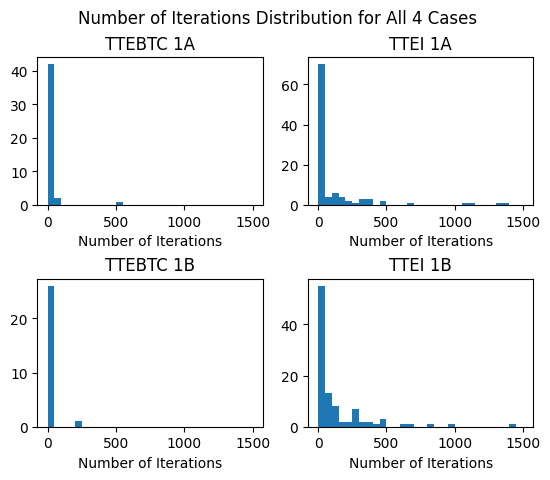

In [10]:
titles = ["TTEBTC 1A", "TTEI 1A", "TTEBTC 1B", "TTEI 1B"]
iters = [results_1_1a["iters"][TTEBTC], results_1_1a["iters"][TTEI], results_1_1b["iters"][TTEBTC], results_1_1b["iters"][TTEI]]
figure, axis = plt.subplots(2, 2)
plt.subplots_adjust(hspace = 0.5) 
plt.suptitle("Number of Iterations Distribution for All 4 Cases")
x = np.arange(1, 2001)
a, b = 0, 0
for i in range(len(iters)):
    y = iters[i]
    axis[a, b].hist(y, bins = 30, range = (0,1500))
    axis[a, b].set_xlabel("Number of Iterations")
    axis[a, b].set_title(f"{titles[i]}")
    if b < 1:
        b += 1
    else:
        a, b = 1, 0
plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\946356866.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


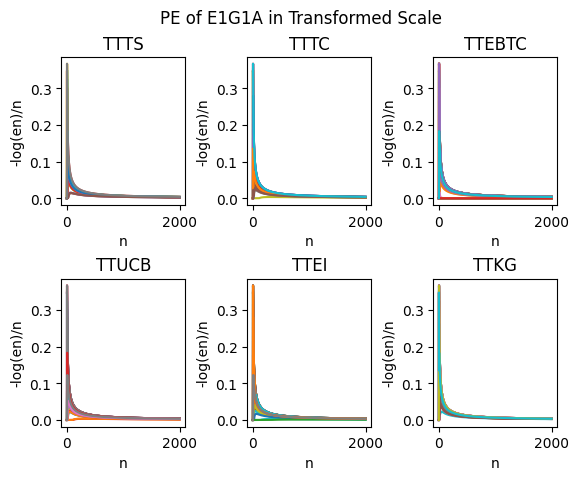

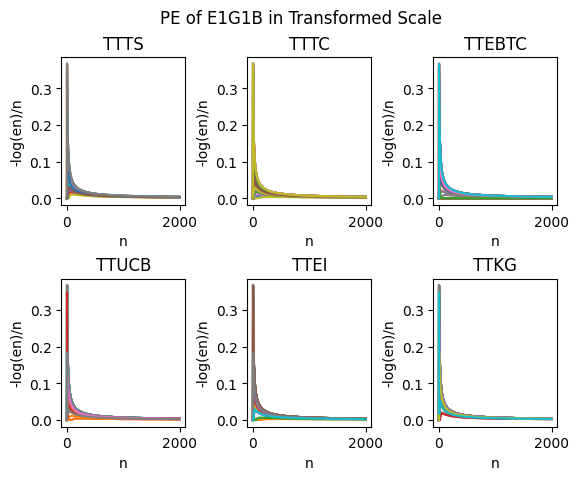

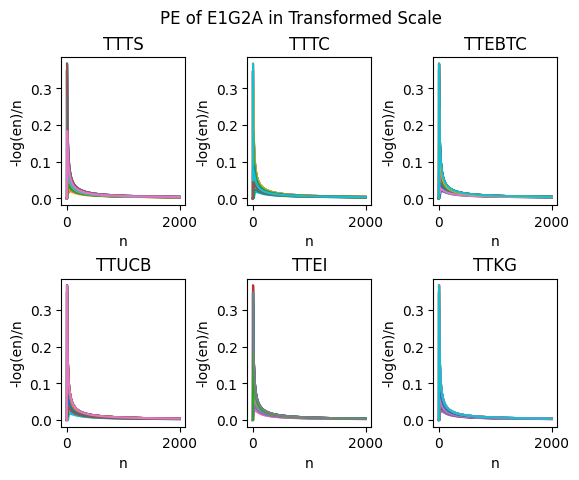

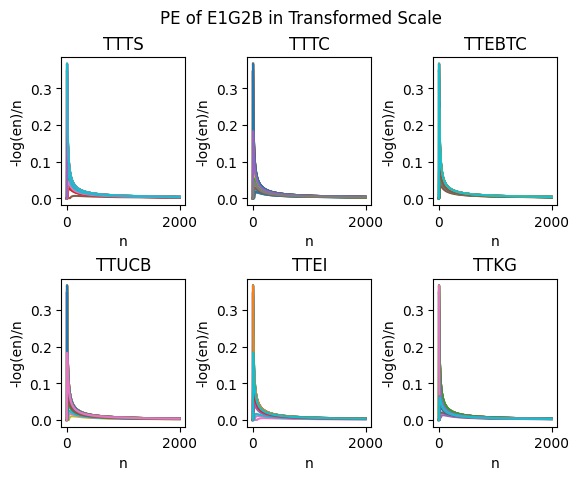

In [11]:
pes = [results_1_1a["pe"], results_1_1b["pe"], results_1_2a["pe"], results_1_2b["pe"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E1G1A", "E1G1B", "E1G2A", "E1G2B"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"PE of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(pes[i])):
        line = pes[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(en)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\3975945330.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


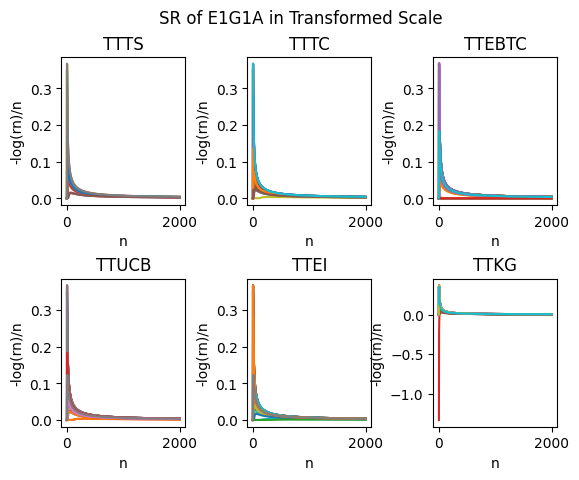

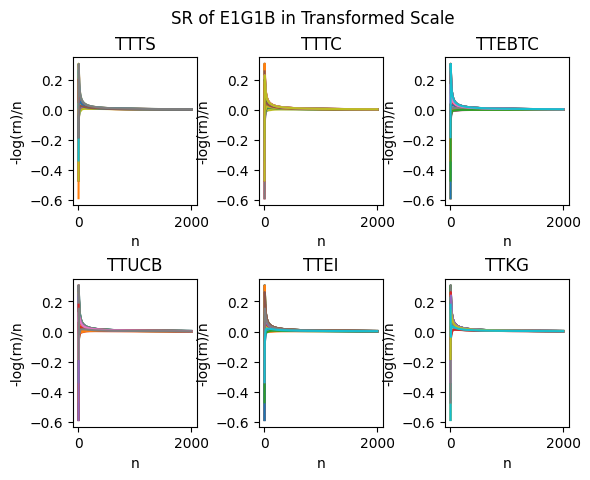

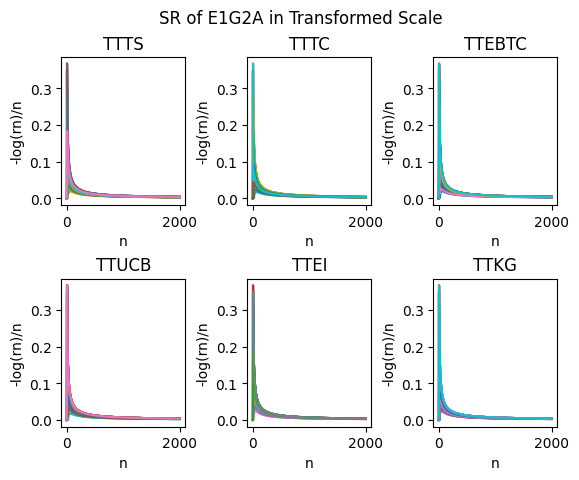

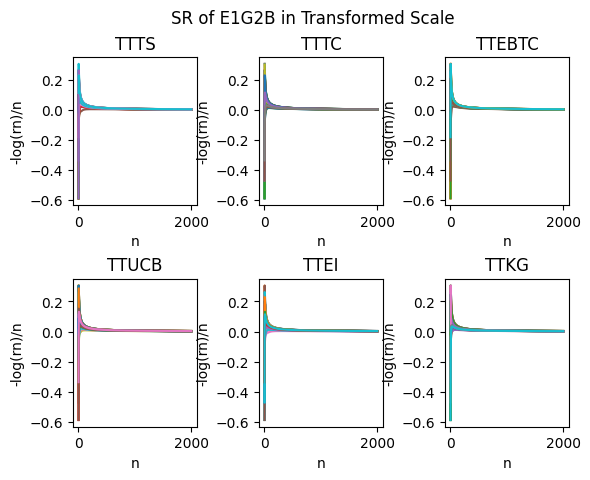

In [12]:
srs = [results_1_1a["sr"], results_1_1b["sr"], results_1_2a["sr"], results_1_2b["sr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E1G1A", "E1G1B", "E1G2A", "E1G2B"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"SR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(srs[i])):
        line = srs[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(rn)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

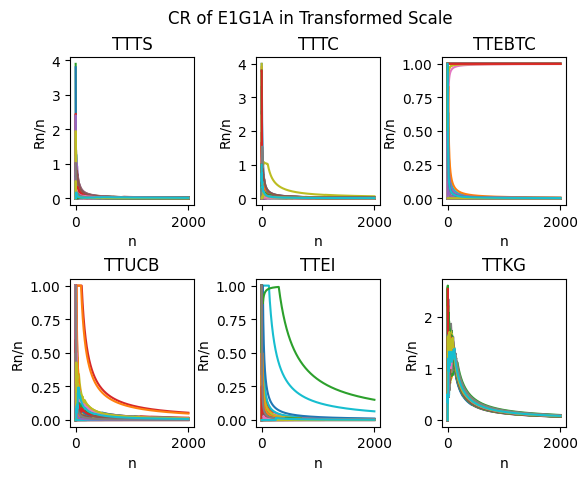

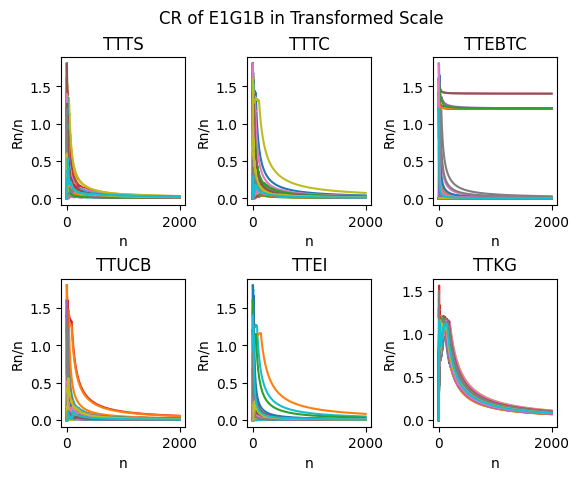

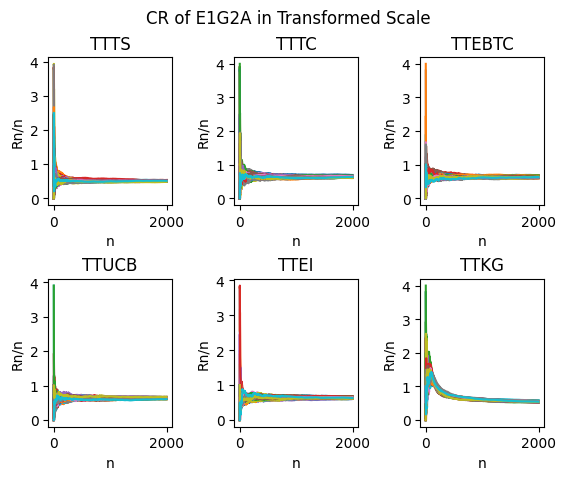

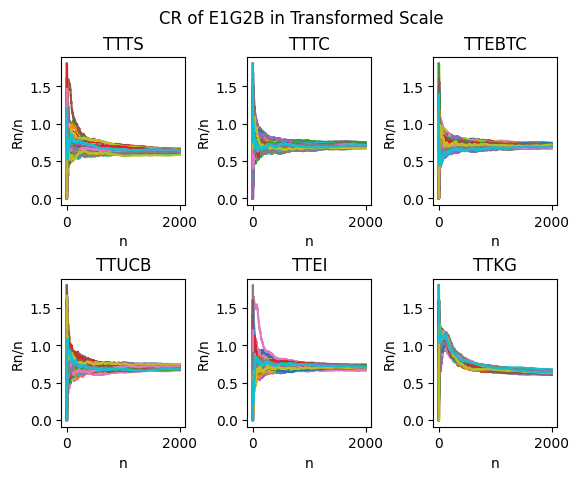

In [13]:
crs = [results_1_1a["cr"], results_1_1b["cr"], results_1_2a["cr"], results_1_2b["cr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E1G1A", "E1G1B", "E1G2A", "E1G2B"]
x = np.arange(1, 2001)

for i in range(len(crs)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"CR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(crs[i])):
        line = crs[i][algos[j]]
        ys = line / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("Rn/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

## Experiment 2

### Group 1

In [22]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 3.3, 3.2, 3.1, 3.0]
variance = 1
other_par = None
top_two = True
confint = 0.9999
params_2_1 = algos, distribution, means, variance, other_par, top_two, confint

In [23]:
np.random.seed(4199)
results_2_1 = run(params_2_1)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.537436910870915, sigma^2 = 1
Arm 2: miu = 3.705941048384956, sigma^2 = 1
Arm 3: miu = 2.861014668726183, sigma^2 = 1
Arm 4: miu = 2.2768609694688617, sigma^2 = 1
Arm 5: miu = 1.6036635105133927, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 4.880450177863207, sigma^2 = 0.04, num_pulls = 25
Arm 2: miu = 3.6394531264512158, sigma^2 = 0.0625, num_pulls = 16
Arm 3: miu = 3.5138283156211, sigma^2 = 0.125, num_pulls = 8
Arm 4: miu = 2.692103578288916, sigma^2 = 0.5, num_pulls = 2
Arm 5: miu = 2.0519903935526083, sigma^2 = 0.5, num_pulls = 2
After 48 iterations, the best arm is arm 1, with p = 0.9999469548921908

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 5.711555714951206, sigma^2 = 1
Arm 2: miu = 3.232806161890161, sigma^2 = 1
Arm 3: miu = 4.449146400787256, sigma^2 = 1
Arm 4: miu = 3.5081651010365222, sig

### Group 2

In [16]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = None
top_two = True
confint = 0.9999
params_2_2 = algos, distribution, means, variance, other_par, top_two, confint

In [17]:
np.random.seed(4199)
results_2_2 = run(params_2_2)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.537436910870915, sigma^2 = 1
Arm 2: miu = 4.405941048384957, sigma^2 = 1
Arm 3: miu = 2.6610146687261826, sigma^2 = 1
Arm 4: miu = 1.1768609694688614, sigma^2 = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 4.953417054832708, sigma^2 = 0.025, num_pulls = 40
Arm 2: miu = 4.09479633013219, sigma^2 = 0.027777777777777776, num_pulls = 36
Arm 3: miu = 2.7924547806056044, sigma^2 = 0.25, num_pulls = 4
Arm 4: miu = 1.1768609694688614, sigma^2 = 1, num_pulls = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1, num_pulls = 1
After 77 iterations, the best arm is arm 1, with p = 0.9999070533320646

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 5.711555714951206, sigma^2 = 1
Arm 2: miu = 3.932806161890161, sigma^2 = 1
Arm 3: miu = 4.2491464007872555, sigma^2 = 1
Arm 4: miu = 2.408

### Group 3

In [6]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [3.0, 2.5, 2.0, 1.5, 1.0]
variance = 1
other_par = None
top_two = True
confint = 0.9999
params_2_3 = algos, distribution, means, variance, other_par, top_two, confint

In [23]:
np.random.seed(4199)
results_2_3 = run(params_2_3)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 2.5374369108709147, sigma^2 = 1
Arm 2: miu = 2.9059410483849564, sigma^2 = 1
Arm 3: miu = 1.6610146687261824, sigma^2 = 1
Arm 4: miu = 0.6768609694688614, sigma^2 = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 3.057124739228947, sigma^2 = 0.016129032258064516, num_pulls = 62
Arm 2: miu = 2.348797383205633, sigma^2 = 0.019607843137254898, num_pulls = 51
Arm 3: miu = 1.734027279802848, sigma^2 = 0.2, num_pulls = 5
Arm 4: miu = 1.860640417914576, sigma^2 = 0.14285714285714285, num_pulls = 7
Arm 5: miu = -0.39633648948660727, sigma^2 = 1, num_pulls = 1
After 121 iterations, the best arm is arm 1, with p = 0.9999104944427019

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 3.7115557149512064, sigma^2 = 1
Arm 2: miu = 2.432806161890161, sigma^2 = 1
Arm 3: miu = 3.2491464007872

In [21]:
np.random.seed(0)
results_2_3a = run(params_2_3)
np.random.seed(1)
results_2_3b = run(params_2_3)
np.random.seed(51111)
results_2_3c = run(params_2_3)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.764052345967664, sigma^2 = 1
Arm 2: miu = 2.900157208367223, sigma^2 = 1
Arm 3: miu = 2.9787379841057393, sigma^2 = 1
Arm 4: miu = 3.740893199201458, sigma^2 = 1
Arm 5: miu = 2.8675579901499675, sigma^2 = 1


Final Iteration Posterior Distribution:
Arm 1: miu = 3.067476588042967, sigma^2 = 0.012048192771084338, num_pulls = 83
Arm 2: miu = 2.4008812547864773, sigma^2 = 0.019999999999999997, num_pulls = 50
Arm 3: miu = 2.1283892426647197, sigma^2 = 0.08333333333333333, num_pulls = 12
Arm 4: miu = 1.3461197725370753, sigma^2 = 0.16666666666666666, num_pulls = 6
Arm 5: miu = 0.790914819885631, sigma^2 = 0.3333333333333333, num_pulls = 3
After 149 iterations, the best arm is arm 1, with p = 0.9999017905673911

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 3.36027108937447, sigma^2 = 1
Arm 2: miu = 1.010223986883473, sigma^2 = 1
Arm 3: miu = 3.966936348480529, sigma^2 = 1
Arm 4: miu = 3.2474600691944175, sigma^2 = 1
Arm 5: miu = 1.7100765499732127, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 2.955520113289955, sigma^2 = 0.018518518518518514, num_pulls = 54
Arm 2: miu = 1.9995217454906415, sigma^2 = 0.045454545454545456, num_pulls = 22
Arm 3: miu = 1.96354707463

### Results

In [25]:
print(f"1: {results_2_1['iters_mean']}, fails = {results_2_1['fails']}")
print(f"2: {results_2_2['iters_mean']}, fails = {results_2_2['fails']}")
print(f"3: {results_2_3['iters_mean']}, fails = {results_2_3['fails']}")

1: {<class 'src.algo.ttts.TTTS'>: 37.68, <class 'src.algo.tttc.TTTC'>: 36.88, <class 'src.algo.ttebtc.TTEBTC'>: 38.22, <class 'src.algo.ttucb.TTUCB'>: 34.95, <class 'src.algo.ttei.TTEI'>: 35.27, <class 'src.algo.ttkg.TTKG'>: 45.31}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.0, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
2: {<class 'src.algo.ttts.TTTS'>: 63.19, <class 'src.algo.tttc.TTTC'>: 61.37, <class 'src.algo.ttebtc.TTEBTC'>: 59.08, <class 'src.algo.ttucb.TTUCB'>: 59.09, <class 'src.algo.ttei.TTEI'>: 57.97, <class 'src.algo.ttkg.TTKG'>: 74.81}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.0, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
3: {<class 'src.algo.ttts.TTTS'>: 206.57, <class 'src.algo.tttc.TTTC'>: 229.15, <cla

In [22]:
print(f"3a: {results_2_3a['iters_mean']}, fails = {results_2_3a['fails']}")
print(f"3b: {results_2_3b['iters_mean']}, fails = {results_2_3b['fails']}")
print(f"3c: {results_2_3c['iters_mean']}, fails = {results_2_3c['fails']}")

3a: {<class 'src.algo.ttts.TTTS'>: 240.34, <class 'src.algo.tttc.TTTC'>: 239.64, <class 'src.algo.ttebtc.TTEBTC'>: 251.48, <class 'src.algo.ttucb.TTUCB'>: 214.76, <class 'src.algo.ttei.TTEI'>: 232.26, <class 'src.algo.ttkg.TTKG'>: 293.57}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.0, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
3b: {<class 'src.algo.ttts.TTTS'>: 209.35, <class 'src.algo.tttc.TTTC'>: 242.72, <class 'src.algo.ttebtc.TTEBTC'>: 248.21, <class 'src.algo.ttucb.TTUCB'>: 231.67, <class 'src.algo.ttei.TTEI'>: 228.93, <class 'src.algo.ttkg.TTKG'>: 289.89}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.0, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
3c: {<class 'src.algo.ttts.TTTS'>: 232.91, <class 'src.algo.tttc.TTTC'

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\2273102818.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


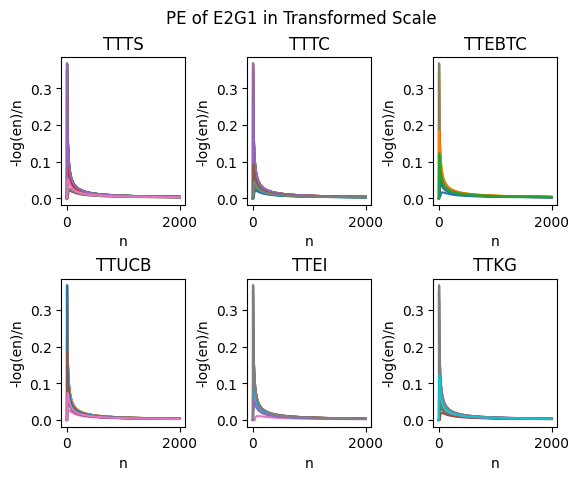

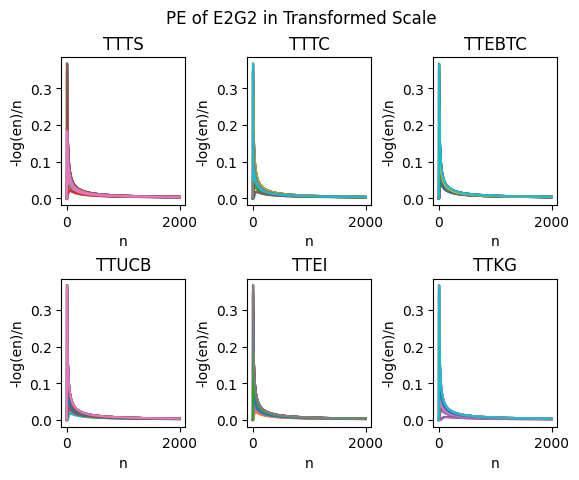

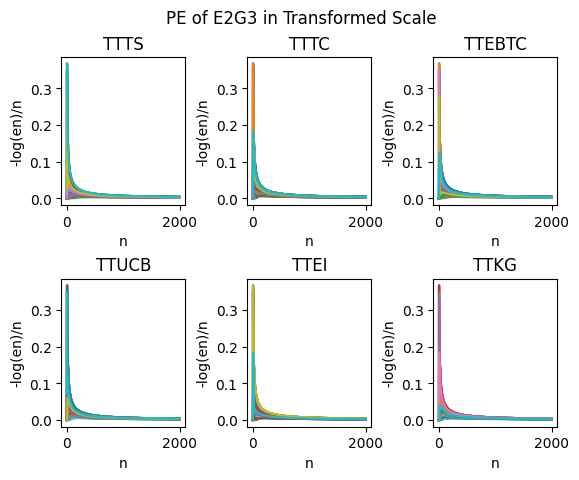

In [30]:
pes = [results_2_1["pe"], results_2_2["pe"], results_2_3["pe"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E2G1", "E2G2", "E2G3"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"PE of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(pes[i])):
        line = pes[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(en)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\911578287.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


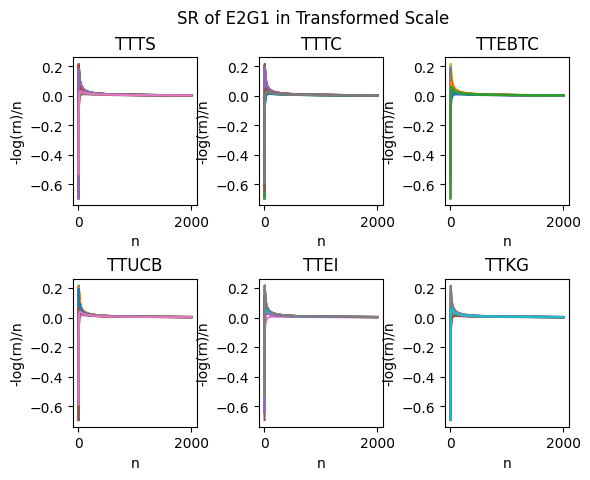

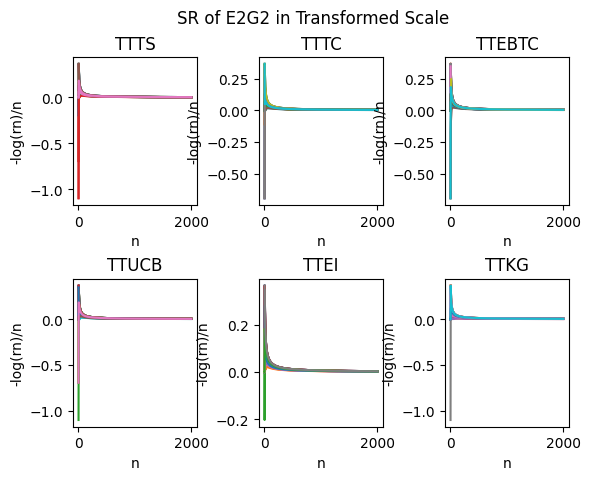

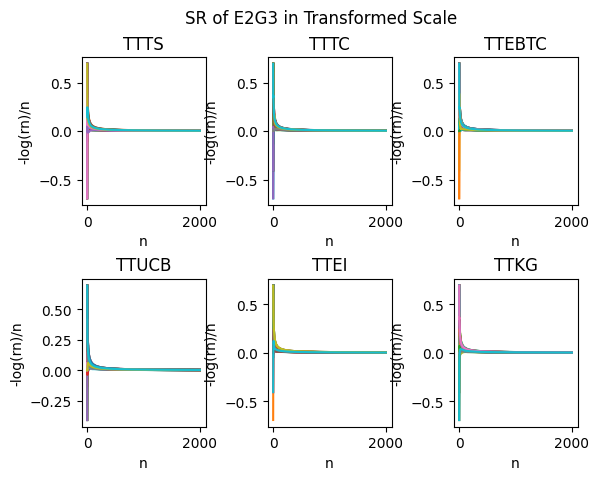

In [27]:
srs = [results_2_1["sr"], results_2_2["sr"], results_2_3["sr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E2G1", "E2G2", "E2G3"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"SR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(srs[i])):
        line = srs[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(rn)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

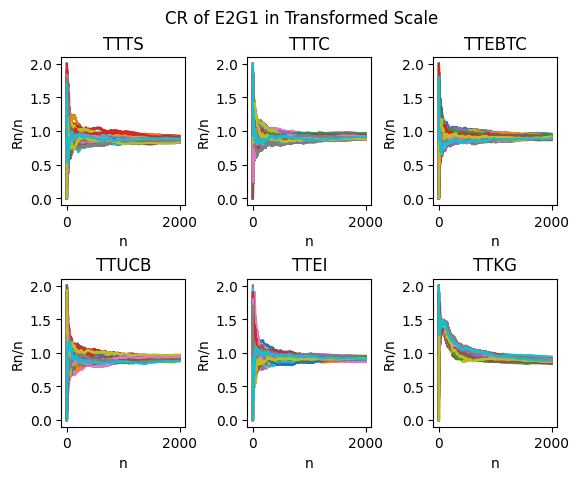

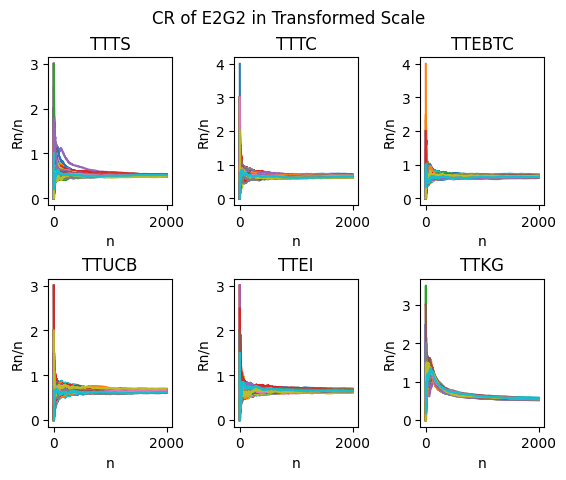

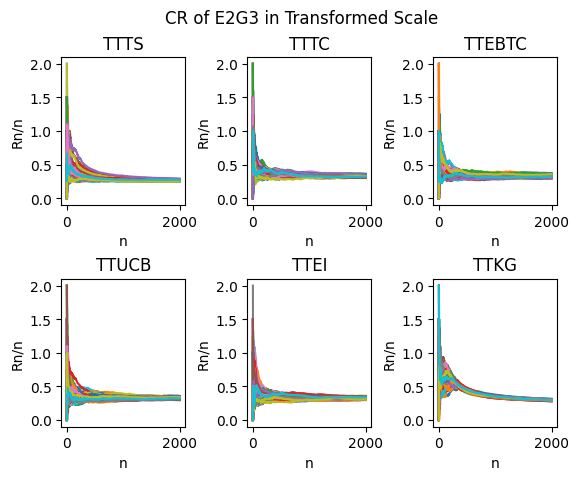

In [28]:
crs = [results_2_1["cr"], results_2_2["cr"], results_2_3["cr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E2G1", "E2G2", "E2G3"]
x = np.arange(1, 2001)

for i in range(len(crs)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"CR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(crs[i])):
        line = crs[i][algos[j]]
        ys = line / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("Rn/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

## Experiment 3

### Group 1

In [134]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = None
top_two = True
confint = 0.9999
params_3_1 = algos, distribution, means, variance, other_par, top_two, confint

In [135]:
np.random.seed(4199)
results_3_1 = run(params_3_1)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.537436910870915, sigma^2 = 1
Arm 2: miu = 4.405941048384957, sigma^2 = 1
Arm 3: miu = 2.6610146687261826, sigma^2 = 1
Arm 4: miu = 1.1768609694688614, sigma^2 = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1
Final Iteration Posterior Distribution:
Arm 1: miu = 4.953417054832708, sigma^2 = 0.025, num_pulls = 40
Arm 2: miu = 4.09479633013219, sigma^2 = 0.027777777777777776, num_pulls = 36
Arm 3: miu = 2.7924547806056044, sigma^2 = 0.25, num_pulls = 4
Arm 4: miu = 1.1768609694688614, sigma^2 = 1, num_pulls = 1
Arm 5: miu = -0.39633648948660727, sigma^2 = 1, num_pulls = 1
After 77 iterations, the best arm is arm 1, with p = 0.9999070533320646

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 5.711555714951206, sigma^2 = 1
Arm 2: miu = 3.932806161890161, sigma^2 = 1
Arm 3: miu = 4.2491464007872555, sigma^2 = 1
Arm 4: miu = 2.408

### Group 2

In [127]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 2.25
other_par = None
top_two = True
confint = 0.9999
params_3_2 = algos, distribution, means, variance, other_par, top_two, confint

In [128]:
np.random.seed(4199)
results_3_2 = run(params_3_2)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.306155366306372, sigma^2 = 2.25
Arm 2: miu = 4.608911572577435, sigma^2 = 2.25
Arm 3: miu = 2.4915220030892735, sigma^2 = 2.25
Arm 4: miu = 0.7652914542032923, sigma^2 = 2.25
Arm 5: miu = -1.0945047342299108, sigma^2 = 2.25
Final Iteration Posterior Distribution:
Arm 1: miu = 5.0541463446449315, sigma^2 = 0.03409090909090914, num_pulls = 66
Arm 2: miu = 3.9961263436646353, sigma^2 = 0.045918367346938806, num_pulls = 49
Arm 3: miu = 2.8871797247050717, sigma^2 = 0.44999999999999996, num_pulls = 5
Arm 4: miu = 0.7652914542032923, sigma^2 = 2.25, num_pulls = 1
Arm 5: miu = -1.0945047342299108, sigma^2 = 2.25, num_pulls = 1
After 117 iterations, the best arm is arm 1, with p = 0.9999081539927811

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 6.06733357242681, sigma^2 = 2.25
Arm 2: miu = 3.8992092428352416, sigma^2 = 2.25
Arm 3

### Group 3

In [129]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 4
other_par = None
top_two = True
confint = 0.9999
params_3_3 = algos, distribution, means, variance, other_par, top_two, confint

In [132]:
np.random.seed(4199)
results_3_3 = run(params_3_3)

Running <class 'src.algo.ttts.TTTS'> ==================================================
Repetition 0
Prior Distribution Initialization:
Arm 1: miu = 4.074873821741829, sigma^2 = 4
Arm 2: miu = 4.811882096769913, sigma^2 = 4
Arm 3: miu = 2.322029337452365, sigma^2 = 4
Arm 4: miu = 0.35372193893772286, sigma^2 = 4
Arm 5: miu = -1.7926729789732145, sigma^2 = 4
Final Iteration Posterior Distribution:
Arm 1: miu = 5.114249478457893, sigma^2 = 0.06451612903225806, num_pulls = 62
Arm 2: miu = 3.6975947664112634, sigma^2 = 0.07843137254901959, num_pulls = 51
Arm 3: miu = 2.468054559605696, sigma^2 = 0.8, num_pulls = 5
Arm 4: miu = 2.7212808358291527, sigma^2 = 0.5714285714285714, num_pulls = 7
Arm 5: miu = -1.7926729789732145, sigma^2 = 4, num_pulls = 1
After 121 iterations, the best arm is arm 1, with p = 0.9999104944427019

Repetition 1
Prior Distribution Initialization:
Arm 1: miu = 6.423111429902413, sigma^2 = 4
Arm 2: miu = 3.865612323780322, sigma^2 = 4
Arm 3: miu = 5.498292801574511, si

In [136]:
print(f"1: {results_3_1['iters_mean']}, fails = {results_3_1['fails']}")
print(f"2: {results_3_2['iters_mean']}, fails = {results_3_2['fails']}")
print(f"3: {results_3_3['iters_mean']}, fails = {results_3_3['fails']}")

1: {<class 'src.algo.ttts.TTTS'>: 63.19, <class 'src.algo.tttc.TTTC'>: 61.37, <class 'src.algo.ttebtc.TTEBTC'>: 59.08, <class 'src.algo.ttucb.TTUCB'>: 59.09, <class 'src.algo.ttei.TTEI'>: 57.97, <class 'src.algo.ttkg.TTKG'>: 74.81}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.0, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
2: {<class 'src.algo.ttts.TTTS'>: 130.41, <class 'src.algo.tttc.TTTC'>: 123.97, <class 'src.algo.ttebtc.TTEBTC'>: 140.15, <class 'src.algo.ttucb.TTUCB'>: 132.83, <class 'src.algo.ttei.TTEI'>: 124.16, <class 'src.algo.ttkg.TTKG'>: 165.04}, fails = {<class 'src.algo.ttts.TTTS'>: 0.0, <class 'src.algo.tttc.TTTC'>: 0.0, <class 'src.algo.ttebtc.TTEBTC'>: 0.0, <class 'src.algo.ttucb.TTUCB'>: 0.0, <class 'src.algo.ttei.TTEI'>: 0.0, <class 'src.algo.ttkg.TTKG'>: 0.0}
3: {<class 'src.algo.ttts.TTTS'>: 206.57, <class 'src.algo.tttc.TTTC'>: 229.15

C:\Users\zlyly\AppData\Local\Temp\ipykernel_48348\671489029.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


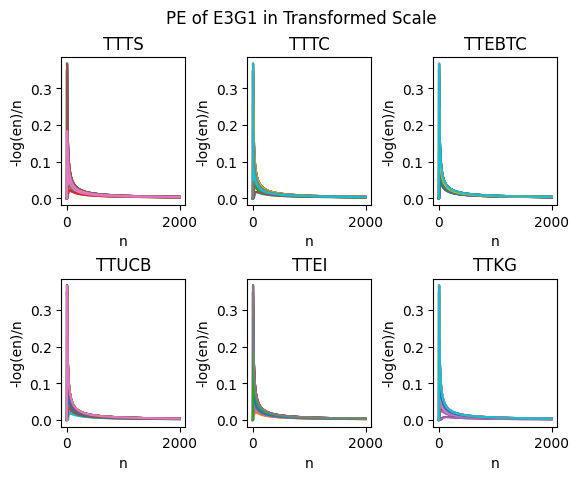

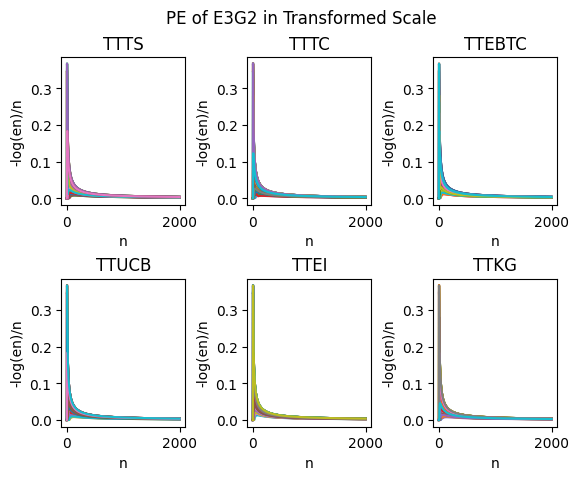

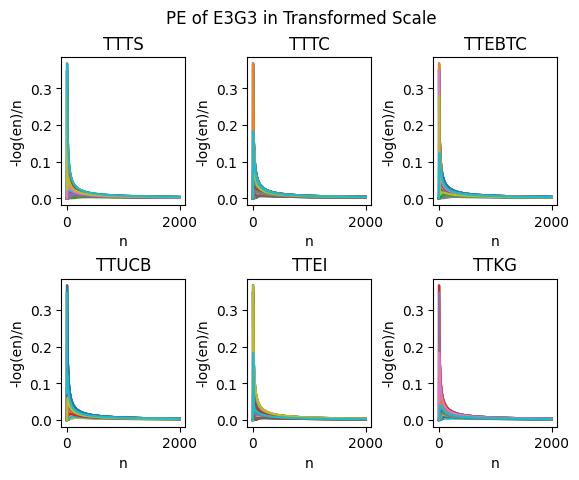

In [137]:
pes = [results_3_1["pe"], results_3_2["pe"], results_3_3["pe"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E3G1", "E3G2", "E3G3"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"PE of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(pes[i])):
        line = pes[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(en)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_48348\699729584.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


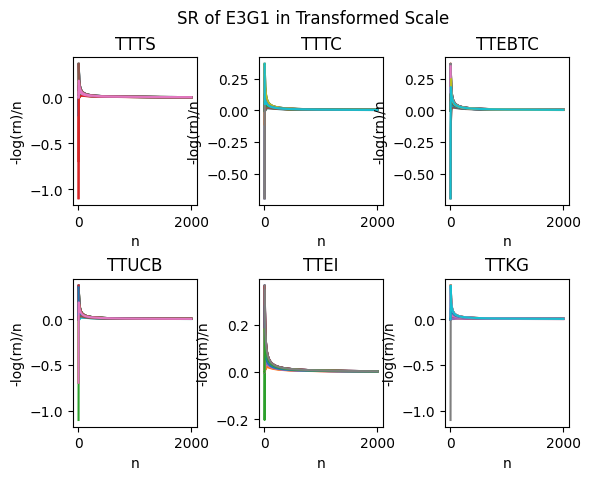

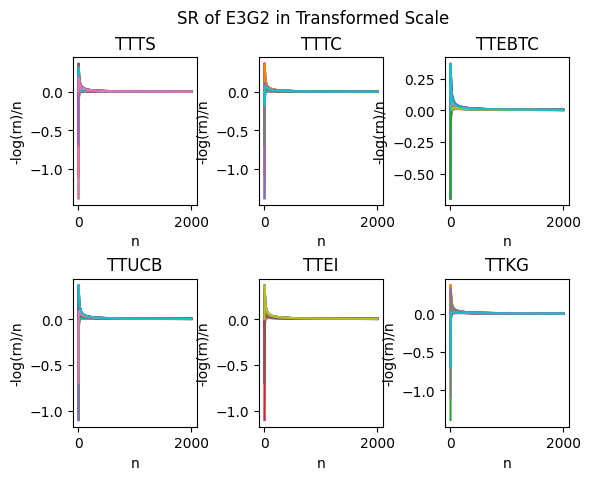

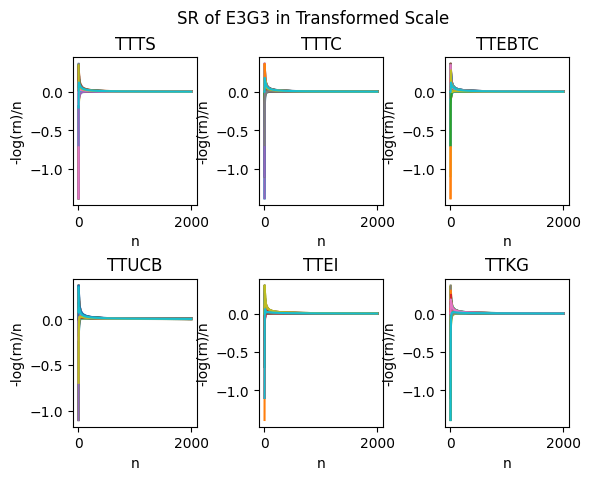

In [138]:
srs = [results_3_1["sr"], results_3_2["sr"], results_3_3["sr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E3G1", "E3G2", "E3G3"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"SR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(srs[i])):
        line = srs[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(rn)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

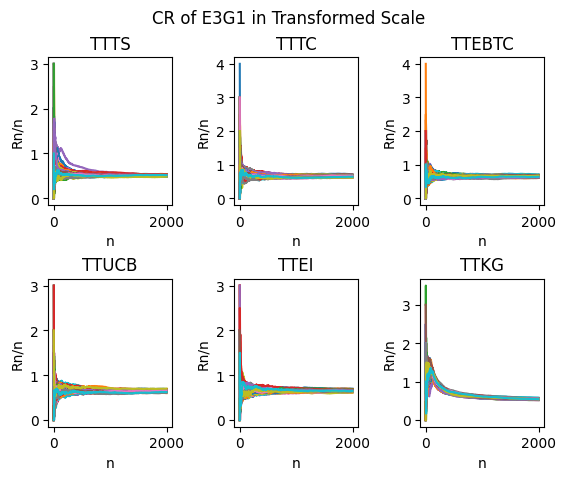

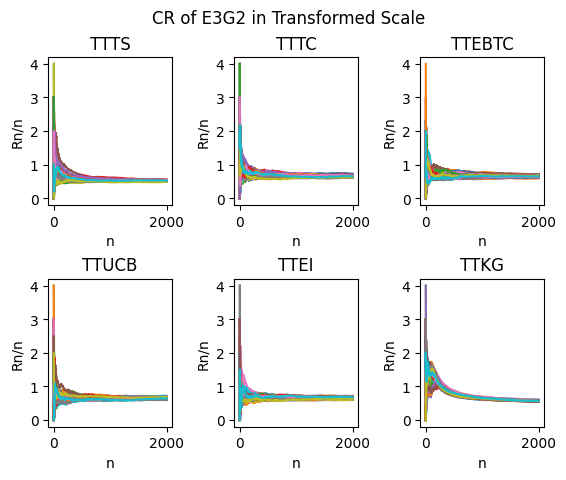

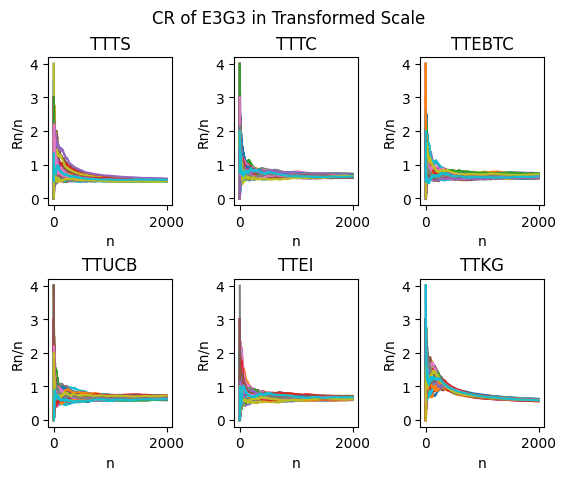

In [139]:
crs = [results_3_1["cr"], results_3_2["cr"], results_3_3["cr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E3G1", "E3G2", "E3G3"]
x = np.arange(1, 2001)

for i in range(len(crs)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"CR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(crs[i])):
        line = crs[i][algos[j]]
        ys = line / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("Rn/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

## Experiment 4

### Group 1

In [ ]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "N"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = None
top_two = True
confint = 0.9999
params_4_1 = algos, distribution, means, variance, other_par, top_two, confint

In [ ]:
np.random.seed(4199)
results_4_1 = run(params_4_1)

### Group 2

In [ ]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "G"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = {"a": 3}
top_two = True
confint = 0.9999
params_4_2a = algos, distribution, means, variance, other_par, top_two, confint

algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "G"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = {"a": 1.5}
top_two = True
confint = 0.9999
params_4_2b = algos, distribution, means, variance, other_par, top_two, confint

In [ ]:
np.random.seed(4199)
results_4_2a = run(params_4_2a)

In [ ]:
np.random.seed(4199)
results_4_2b = run(params_4_2b)

### Group 3

In [ ]:
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "B"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = {"a": 1, "b": 5}
top_two = True
confint = 0.9999
params_4_3a = algos, distribution, means, variance, other_par, top_two, confint

algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "B"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = {"a": 2, "b": 5}
top_two = True
confint = 0.9999
params_4_3b = algos, distribution, means, variance, other_par, top_two, confint

algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
distribution = "B"
means = [5.0, 4.0, 3.0, 2.0, 1.0]
variance = 1
other_par = {"a": 5, "b": 5}
top_two = True
confint = 0.9999
params_4_3c = algos, distribution, means, variance, other_par, top_two, confint

In [ ]:
np.random.seed(4199)
results_4_3a = run(params_4_3a)

In [ ]:
np.random.seed(4199)
results_4_3b = run(params_4_3b)

In [ ]:
np.random.seed(4199)
results_4_3c = run(params_4_3c)

In [ ]:
print(f"1: {results_4_1['iters_mean']}, fails = {results_3_1['fails']}")
print(f"2A: {results_4_2a['iters_mean']}, fails = {results_4_2a['fails']}")
print(f"2B: {results_4_2b['iters_mean']}, fails = {results_4_2b['fails']}")
print(f"3A: {results_4_3a['iters_mean']}, fails = {results_4_3a['fails']}")
print(f"3B: {results_4_3b['iters_mean']}, fails = {results_4_3b['fails']}")
print(f"3C: {results_4_3c['iters_mean']}, fails = {results_4_3c['fails']}")

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\2273102818.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


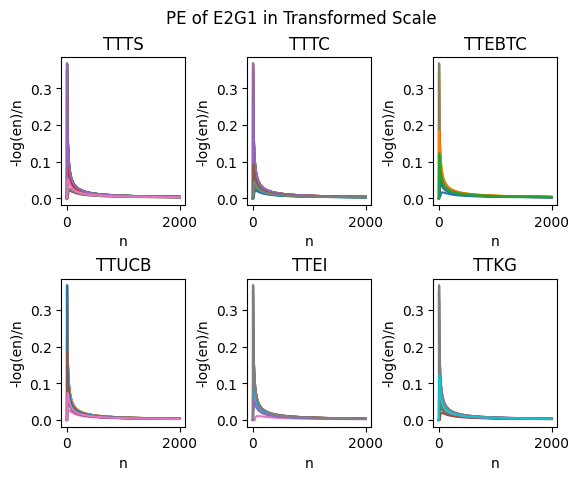

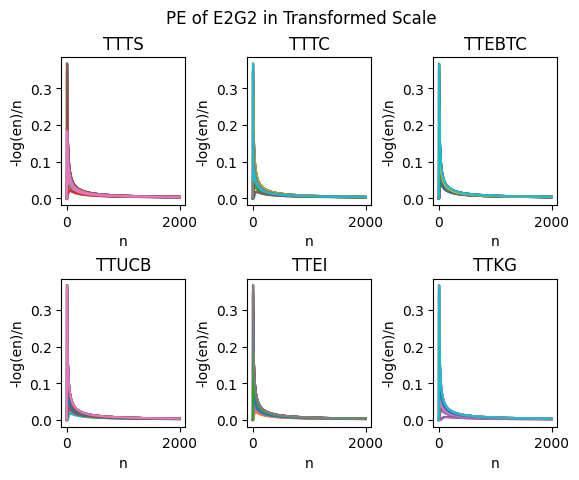

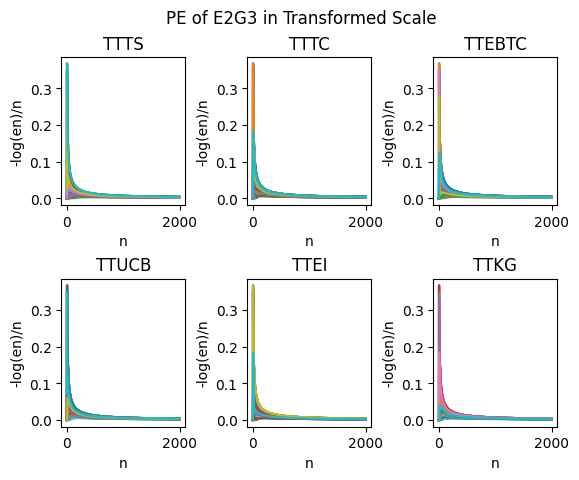

In [ ]:
pes = [results_4_1["pe"], results_4_2a["pe"], results_4_2b["pe"], results_4_3a["pe"], results_4_3b["pe"], results_4_3c["pe"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E4G1", "E4G2A", "E4G2B", "E4G3A", "E4G3B", "E4G3C"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"PE of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(pes[i])):
        line = pes[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(en)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\911578287.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


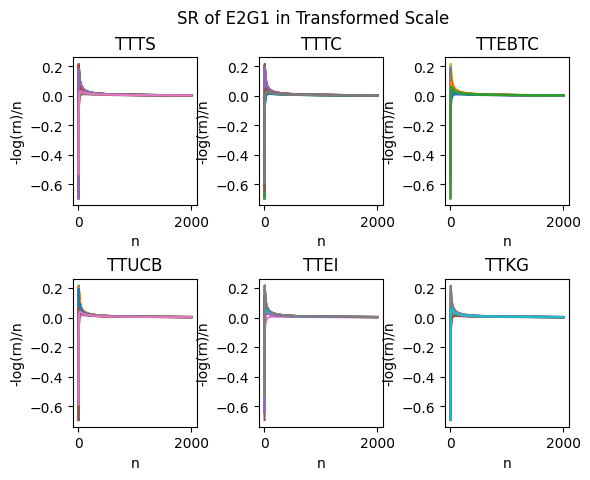

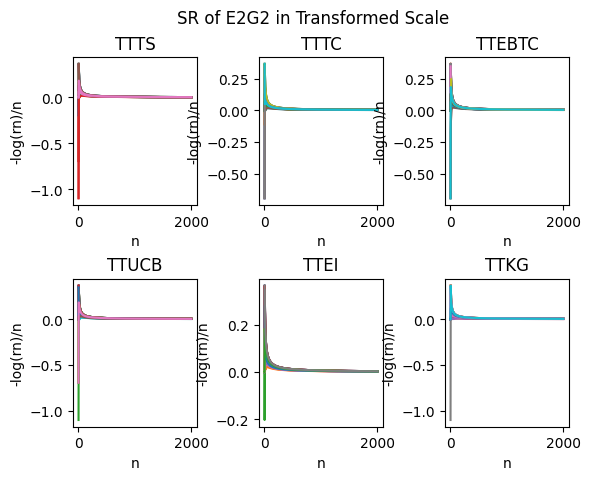

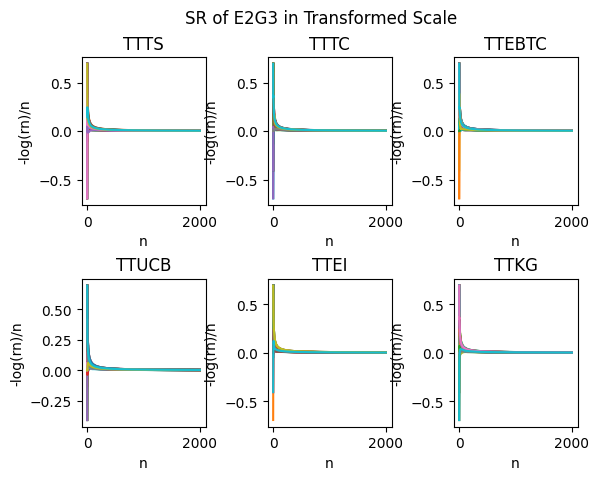

In [ ]:
pes = [results_4_1["sr"], results_4_2a["sr"], results_4_2b["sr"], results_4_3a["sr"], results_4_3b["sr"], results_4_3c["sr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E4G1", "E4G2A", "E4G2B", "E4G3A", "E4G3B", "E4G3C"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"SR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(srs[i])):
        line = srs[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(rn)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

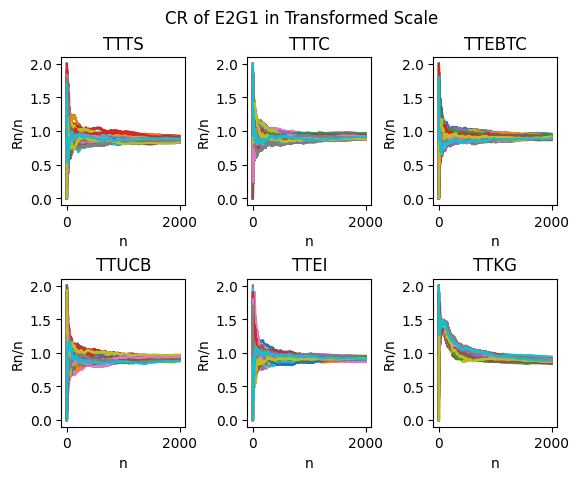

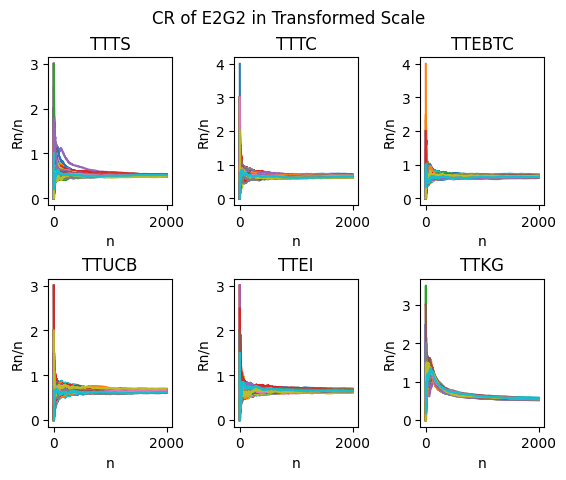

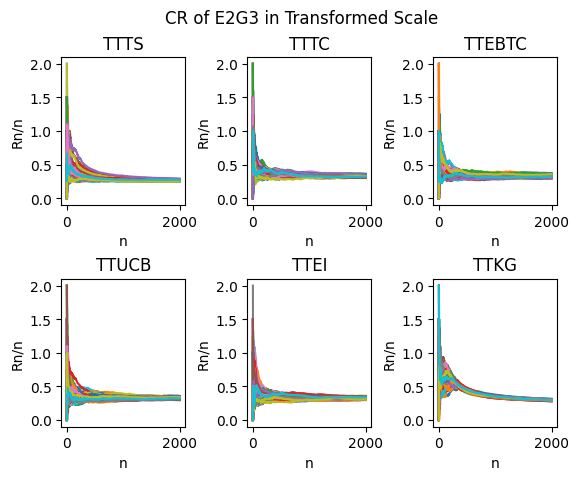

In [ ]:
pes = [results_4_1["cr"], results_4_2a["cr"], results_4_2b["cr"], results_4_3a["cr"], results_4_3b["cr"], results_4_3c["cr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E4G1", "E4G2A", "E4G2B", "E4G3A", "E4G3B", "E4G3C"]
x = np.arange(1, 2001)

for i in range(len(crs)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"CR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(crs[i])):
        line = crs[i][algos[j]]
        ys = line / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("Rn/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\2273102818.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


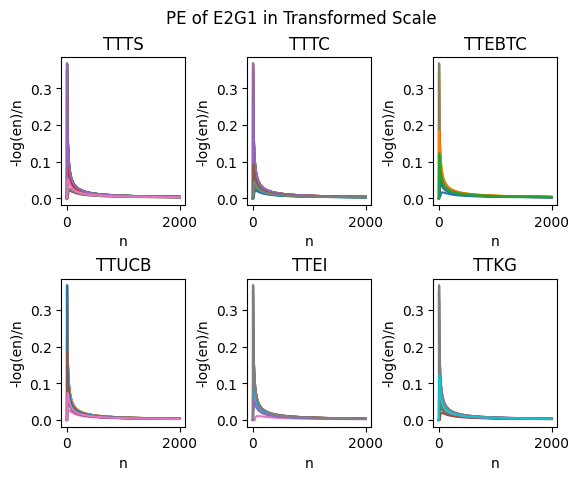

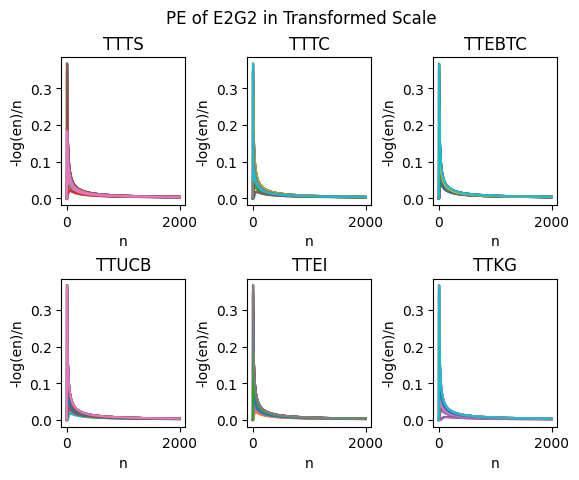

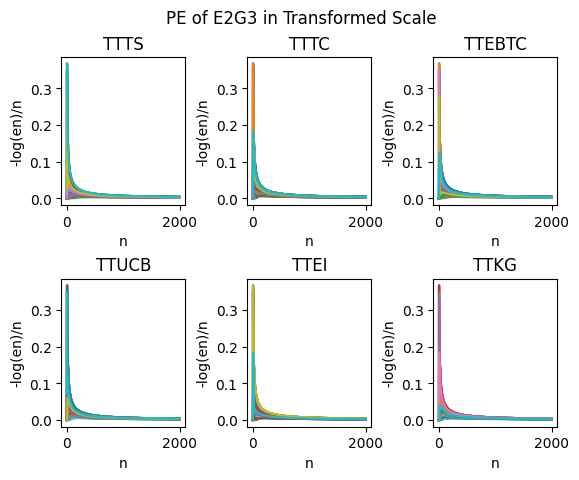

In [ ]:
pes = [results_3_1["pe"], results_3_2["pe"], results_3_3["pe"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E3G1", "E3G2", "E3G3"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"PE of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(pes[i])):
        line = pes[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(en)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

C:\Users\zlyly\AppData\Local\Temp\ipykernel_14124\911578287.py:14: RuntimeWarning: divide by zero encountered in log
  ys = -np.log(line) / x


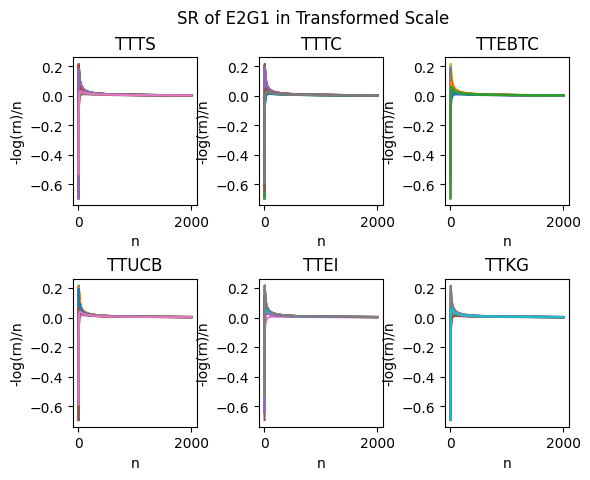

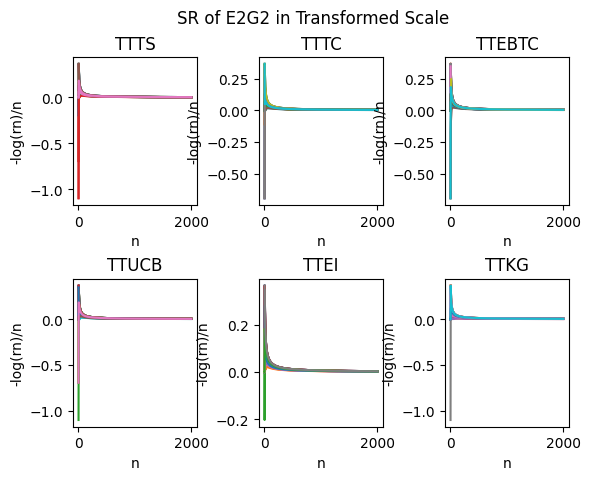

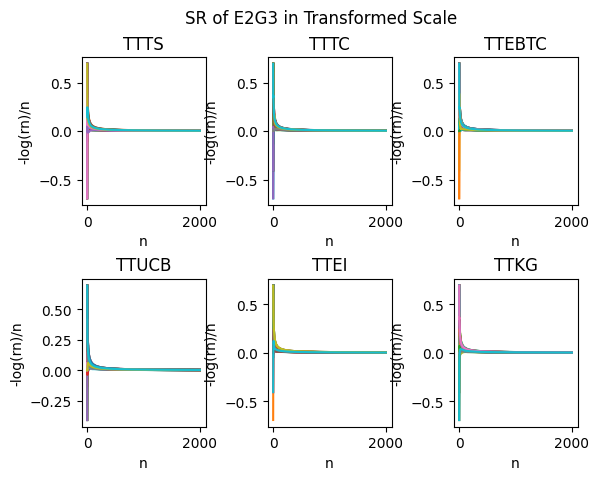

In [ ]:
srs = [results_3_1["sr"], results_3_2["sr"], results_3_3["sr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E3G1", "E3G2", "E3G3"]
x = np.arange(1, 2001)

for i in range(len(pes)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"SR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(srs[i])):
        line = srs[i][algos[j]]
        ys = -np.log(line) / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("-log(rn)/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

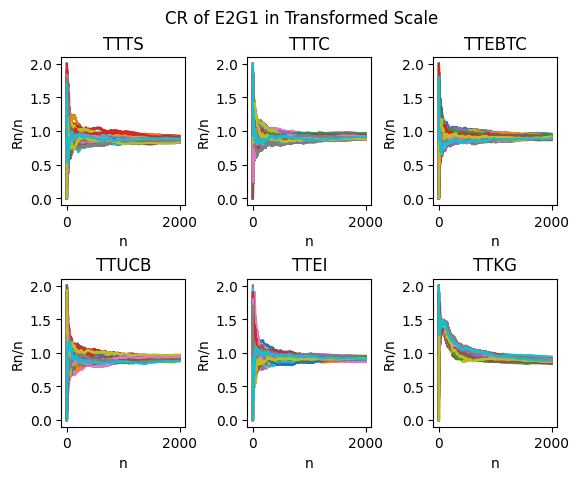

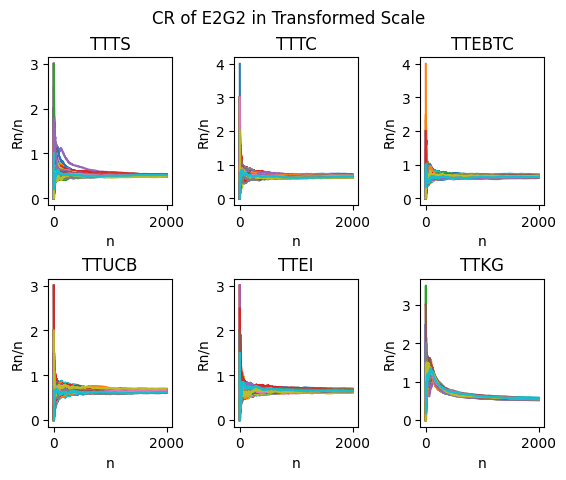

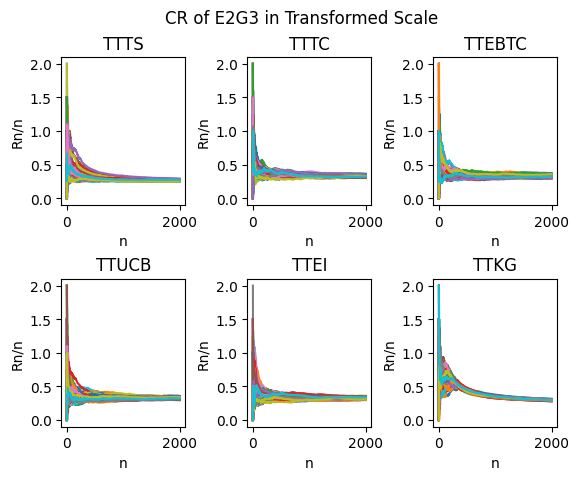

In [ ]:
crs = [results_3_1["cr"], results_3_2["cr"], results_3_3["cr"]]
algos = [TTTS, TTTC, TTEBTC, TTUCB, TTEI, TTKG]
algo_names = ["TTTS", "TTTC", "TTEBTC", "TTUCB", "TTEI", "TTKG"]
names = ["E3G1", "E3G2", "E3G3"]
x = np.arange(1, 2001)

for i in range(len(crs)):
    figure, axis = plt.subplots(2, 3) 
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5) 
    plt.suptitle(f"CR of {names[i]} in Transformed Scale")
    a, b = 0, 0
    for j in range(len(crs[i])):
        line = crs[i][algos[j]]
        ys = line / x
        for y in ys:
            axis[a, b].plot(x, y)
        axis[a, b].set_xlabel("n")
        axis[a, b].set_ylabel("Rn/n")
        axis[a, b].set_title(f"{algo_names[j]}")
        if b < 2:
            b += 1
        else:
            a, b = 1, 0
    plt.show()

# OTHERS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


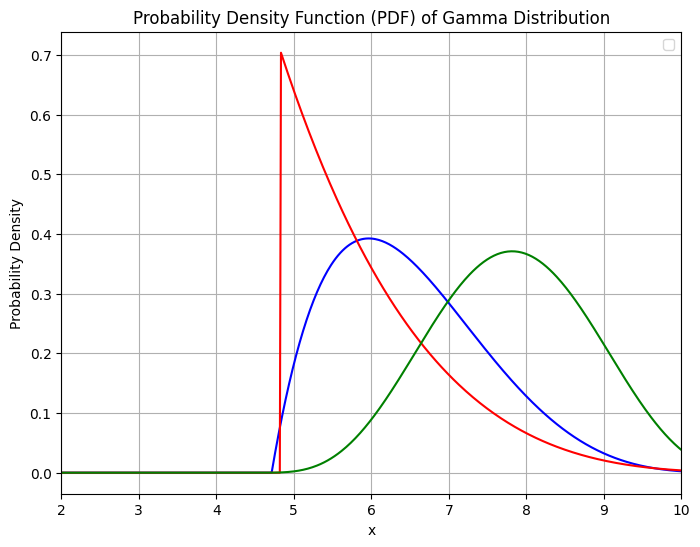

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define parameters for the gamma distribution
a = 2

# Generate some random variates from the gamma distribution (optional)


# Generate values to plot the PDF
x = np.linspace(0, 15, 1000)  # Range of x values

# Calculate the PDF
a = 2
b = 5
E = a / (a + b)
V = (E * (1-E)) / (a + b + 1)
pdf = beta.pdf(x, a, b, 5 - E, np.sqrt(1 / V))

a = 1
b = 5
E = a / (a + b)
V = (E * (1-E)) / (a + b + 1)
pdf2 = beta.pdf(x, a, b, 5 - E, np.sqrt(1 / V))

a = 5
b = 5
E = a / (a + b)
V = (E * (1-E)) / (a + b + 1)
pdf3 = beta.pdf(x, a, b, 5 - E, np.sqrt(1 / V))

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, color = "b")
plt.plot(x, pdf2, color = "red")
plt.plot(x, pdf3, color = "green")
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Gamma Distribution')
plt.xlim((2, 10))
plt.legend()
plt.grid(True)
plt.show()

In [118]:
a = 5
b = 10
V = (a*b)/(((a + b) ** 2) * (a + b + 1))
V2 = (E * (1-E)) / (a + b + 1)
E = a / (a + b)
beta.var(5,100, -E, scale = np.sqrt(1/V))


0.030804774740084705

In [120]:
a = 16
E = np.sqrt(a)
V = a
print(gamma.mean(a, 5 - E, np.sqrt(16 / V)))
print(gamma.var(a, 5 - E, np.sqrt(16 / V)))

17.0
16.0


In [103]:
beta.mean(a, b, -E, scale = 1/V)

54.5

In [109]:
V

0.022727272727272728

In [110]:
V2

0.022727272727272728

In [98]:
E

0.5

0.018825140118940657